# Lecture 14: How to set the alpha then?


In [ ]:
from sklearn.datasets import make_sparse_uncorrelated
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
X, y = make_sparse_uncorrelated(n_samples= 1000, n_features= 400, random_state= 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.69


This discrepancy between performance on the training set and the test set is a clear sign of *overfitting*, and therefore we should try to find a model that allows us to control complexity.

## Ridge regression

Ridge regression is also known as L2 regularization.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score for Ridge: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score for Ridge: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score for Ridge: 0.98
Test set score for Ridge: 0.71


In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.78


In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.69


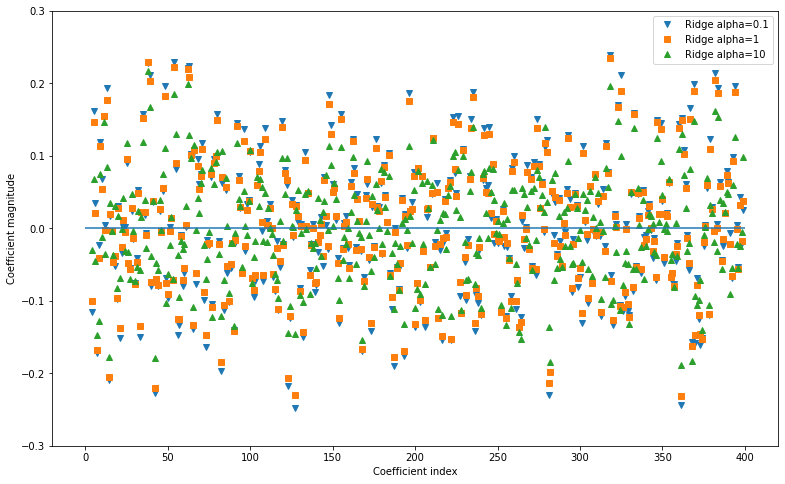

In [ ]:
plt.figure(figsize = (13,8))

#plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")



plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-.3, .3)
plt.legend()
plt.show()

### Now try to find the optimal value of the regularization parameter alpha

**Grid search algorithm**

1. Need to set a range. The following `alpha_range` is just an example.

In [ ]:
alpha_range = [0.01, 0.1, 1, 10, 100, 1000]
ridge = Ridge()

2. Create a dictionary of hyperparameters to search over

In [ ]:
param_grid = {'alpha': alpha_range}

3. Use GridSearchCV to perform k-fold cross-validation and select the best value of alpha

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]})

4. Print the best value of alpha and the corresponding mean cross-validation score

In [ ]:
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best cross-validation score:", grid_search.best_score_)

Best alpha: 100
Best cross-validation score: 0.6583904813126714


5. Fit a Ridge regression model with the best value of alpha


In [ ]:
ridge = Ridge(alpha=grid_search.best_params_['alpha'])
ridge.fit(X_train, y_train)

Ridge(alpha=100)

6. Examine differnt values of folds and alpha range

## Lasso

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.57
Test set score: 0.58
Number of features used: 3


In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.97
Test set score: 0.89
Number of features used: 275


- A lower alpha allowed us to fit a more complex model, which worked better on the training and test data.
- The performance is slightly better than using Ridge, and we are using only 33 of the 104 features.
- This makes this model potentially easier to understand.

If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression:

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.98
Test set score: 0.70
Number of features used: 398


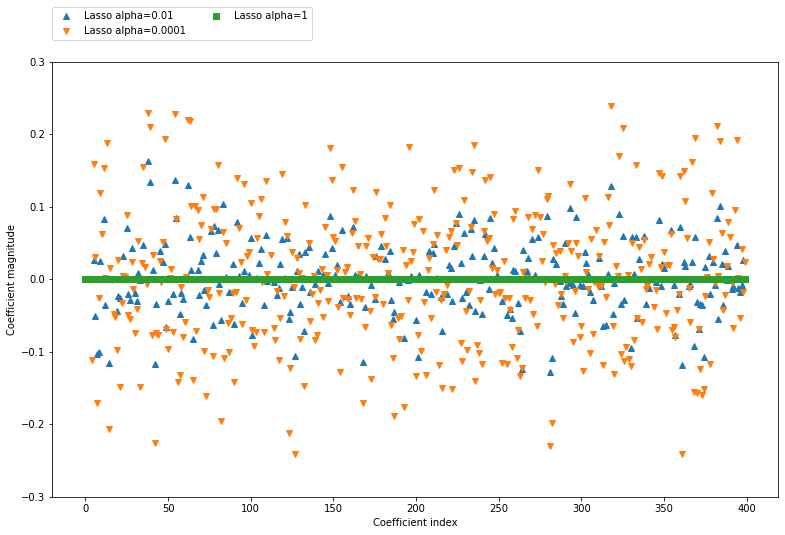

In [ ]:
plt.figure(figsize = (13,8))

plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")

#plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-0.3, .3)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

Let's apply the similar technique.

In [ ]:
alpha_range = [0.1, 1, 10, 100, 1000]

# Create a Lasso regression model
lasso = Lasso()

# Create a dictionary of hyperparameters to search over
param_grid = {'alpha': alpha_range}

# Use GridSearchCV to perform k-fold cross-validation and select the best value of alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best value of alpha and the corresponding mean cross-validation score
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best cross-validation score:", grid_search.best_score_)

# Fit a Lasso regression model with the best value of alpha
lasso = Lasso(alpha=grid_search.best_params_['alpha'])
lasso.fit(X_train, y_train)



Best alpha: 0.1
Best cross-validation score: 0.912275062713066


Lasso(alpha=0.1)

In [ ]:
print("Number of features used:", np.sum(lasso.coef_ != 0))

Number of features used: 14


In [ ]:
alpha_range = [0.0001, 0.001, 0.1, 1, 10, 100]

# Create a Lasso regression model
lasso = Lasso(max_iter=100000)

# Create a dictionary of hyperparameters to search over
param_grid = {'alpha': alpha_range}

# Use GridSearchCV to perform k-fold cross-validation and select the best value of alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best value of alpha and the corresponding mean cross-validation score
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best cross-validation score:", grid_search.best_score_)

# Fit a Lasso regression model with the best value of alpha
lasso = Lasso(alpha=grid_search.best_params_['alpha'])
lasso.fit(X_train, y_train)


Best alpha: 0.1
Best cross-validation score: 0.912275062713066


Lasso(alpha=0.1)

In [ ]:
print("Number of features used:", np.sum(lasso.coef_ != 0))

Number of features used: 14
